# Project: Wrangling and Analyze Data

# Table of Contents 
<ol>
<li><a href="#intro">Introduction</a></li>
<li><a href="#datagather">Data Gathering</a></li> 
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean"> Cleaning Data</a></li>
<li><a href="#store"> Storing Data</a></li>
<li><a href="#analyze"> Analyzing Data</a></li>
</ol>


In [1]:
import requests
import pandas as pd
import numpy as np
import os
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from IPython import display
import config

<a id='datagather'></a>
## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#create a folder named image predictions if it does n0t exist  
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
#use the request library to download the the tsv file from the url programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open (os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
df2 = pd.read_csv('image_predictions/image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
auth = OAuthHandler(config.consumer_key, config.consumer_secret)
auth.set_access_token(config.access_token, config.access_secret)
api = tweepy.API(auth, retry_count=2,  wait_on_rate_limit=True)

In [6]:
tweet_id = df1.tweet_id.values
print(len(tweet_id))

2356


In [7]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_id:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [8]:
with open ('tweet_json.txt','r') as fp:
    print(len(fp.readlines()))

2325


In [9]:
tweets_list = []
with open ('tweet_json.txt','r') as file:
    count=1
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        tweets_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
df3 = pd.DataFrame(tweets_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])  

<a id ='assess'></a>
## Assessing Data

In [10]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
df1.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [13]:
df1.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [14]:
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [15]:
df1[df1['text'].str.match("(RT\s)(@.+:)")==True] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


Inspected 313, 342,433, 516, 784,902,1068, 1120, 1165,1202,1228,1254,1274,1351,

In [16]:
df1.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [17]:
df1['rating'] = df1.rating_numerator/df1.rating_denominator

In [18]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
df3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6999,33797
1,892177421306343426,5298,29314
2,891815181378084864,3477,22043
3,891689557279858688,7220,36917
4,891327558926688256,7753,35297
...,...,...,...
2320,666049248165822465,37,89
2321,666044226329800704,115,247
2322,666033412701032449,36,100
2323,666029285002620928,39,112


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   retweet_count   2325 non-null   int64
 2   favorite_count  2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [22]:
q_low = df1["rating"].quantile(0.01)
q_hi  = df1["rating"].quantile(0.9)
print(q_low)
print(q_hi)

0.3
1.3


In [23]:
pd.set_option("display.max_colwidth", -1)
pd.set_option('display.max_rows', None)
df1.text[df1['rating']>1.3]

C:\Users\David Eruemu\.conda\envs\jupiter\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


9       This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A            
22      I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba                                     
35      I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk                                                                                                  
41      I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC         
55      @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s                                                                              
56      Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiri

In [24]:
df1.text[df1['rating']<0.3]

315     When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag                           
605     RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…
1016    PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX                     
1165    Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                            
1446    After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me                                       
1598    Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating    
1761    Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/

In [25]:
df1.rating_numerator[df1['rating']>1.3]

9       14  
22      14  
35      14  
41      14  
55      17  
56      14  
64      14  
68      14  
76      14  
78      14  
83      14  
95      14  
101     14  
110     14  
117     14  
123     14  
141     14  
149     14  
164     14  
184     14  
185     14  
186     14  
187     14  
188     420 
189     666 
195     14  
199     14  
209     14  
214     14  
268     14  
285     15  
290     182 
291     15  
298     14  
313     960 
339     14  
340     75  
347     14  
369     14  
372     14  
395     14  
404     14  
418     14  
426     14  
434     14  
436     14  
446     14  
447     14  
448     14  
449     14  
490     14  
516     24  
533     14  
589     14  
631     14  
657     14  
695     75  
758     14  
763     27  
788     14  
866     14  
924     14  
979     1776
1053    14  
1605    14  
1609    14  
1712    26  
2074    420 
Name: rating_numerator, dtype: int64

In [26]:
df1.rating_numerator[df1['rating']<0.3]

315     0
605     1
1016    0
1165    4
1446    1
1598    4
1761    2
1764    2
1869    1
1920    2
1940    1
2038    1
2079    2
2091    1
2237    2
2246    2
2261    1
2310    2
2326    2
2338    1
2349    2
Name: rating_numerator, dtype: int64

In [27]:
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_rows')

### Quality issues
#### Twitter archive data
1. <a href='#is1'>The `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`,	`retweeted_status_user_id`, and `retweeted_status_timestamp`, `doggo`, `floofer`, `pupper` and `puppo` columns contain too many null values to be used for analysis</a>

2. <a href ='#is2'>The `rating_numerator` and `rating_denominator` columns should be float instead of int </a>

3. <a href ='#is3'>Incorrect values in rows 55, 313, 516, 695, 763,1712 and 1165</a>

4. <a href ='#is4'>The `timestamp` has the object data type instead of datetime</a> 

5. <a href ='#is5'>The `tweet_id` column present in all dataframes should be an object instead of an int</a>

6. <a href ='#is6'>incorrect dog `name` values</a>

7. <a href ='#is7'>Some of the tweets are retweets</a>

14. <a href ='#is14'>The `text` column contains the image url which should be a seperate variable</a>

13. <a href ='#is13'>Not all the tweets have images </a>

#### Image predictions data

10. <a href ='#is8'>inconsistent number of rows with archive data</a>

11. <a href ='#is9'>incomprehensible column names</a> 

12. <a href ='#is10'>underscores between text in `p1`, `p2` and `p3`</a>

13. <a href ='#is11'>different case style for text in `p1`, `p2` and `p3`</a>

14. <a href ='#is12'>some predictions aren't dogs</a>


### Tidiness issues
#### Twitter archive data

15. <a href ='#is15'> the dog stage is one variable and hence should form single column. But this variable is spread across 4 columns - doggo, floofer, pupper, puppo.</a>

16. <a href ='#is16'>Information about one type of observational unit (tweets) is spread across three different files/dataframes.


<a id= clean></a>
## Cleaning Data

In [28]:
# Make copies of original pieces of data
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

<a id='is1'></a>
### Issue #1:

 The in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns contain too many null values to be used for analysis
 
 __Define__ :  drop unnecessary columns

#### Code

In [29]:
df1_clean = df1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Test

In [30]:
df1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'rating'],
      dtype='object')

<a id='is2'></a>
### Issue #2:

The `rating_numerator` and `rating_denominator` columns should be float instead of int 

#### Code

In [31]:
df1_clean['rating_numerator']=df1_clean['rating_numerator'].astype('float')
df1_clean['rating_denominator']=df1_clean['rating_denominator'].astype('float')

#### Test

In [32]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   timestamp           2356 non-null   object 
 2   source              2356 non-null   object 
 3   text                2356 non-null   object 
 4   expanded_urls       2297 non-null   object 
 5   rating_numerator    2356 non-null   float64
 6   rating_denominator  2356 non-null   float64
 7   name                2356 non-null   object 
 8   doggo               2356 non-null   object 
 9   floofer             2356 non-null   object 
 10  pupper              2356 non-null   object 
 11  puppo               2356 non-null   object 
 12  rating              2356 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 239.4+ KB


<a id='is3'></a>
### Issue #3:

Incorrect values in rows 55, 313, 516, 695, 763,1712 and 1165

#### Code

In [33]:
df1_clean.iloc[[55,313,516,695,763,1712,1165]]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
55,881633300179243008,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17.0,10.0,None,None,None,None,None,1.700000
313,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960.0,0.0,None,None,None,None,None,inf
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,None,None,None,None,3.428571
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,None,None,None,None,7.500000
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,None,None,pupper,None,2.700000
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10.0,None,None,None,None,None,2.600000
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4.0,20.0,None,None,None,None,None,0.200000


In [34]:
df1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'rating'],
      dtype='object')

In [35]:
df1_clean.iloc[55, 5] = 13
df1_clean.iloc[55, 6] = 10

df1_clean.iloc[313, 5] = 13
df1_clean.iloc[313, 6] = 10

df1_clean.iloc[516, 5] = np.nan
df1_clean.iloc[516, 6] = np.nan

df1_clean.iloc[695, 5] = 14
df1_clean.iloc[695, 6] = 10

df1_clean.iloc[763, 5] = 7
df1_clean.iloc[763, 6] = 10

df1_clean.iloc[1712, 5] = 11.26
df1_clean.iloc[1712, 6] = 10

df1_clean.iloc[1165, 5] = 13
df1_clean.iloc[1165, 6] = 10

#### Test

In [36]:
df1_clean.iloc[[55,313,516,695,763,1712,1165]]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
55,881633300179243008,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,13.00,10.0,None,None,None,None,None,1.700000
313,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,13.00,10.0,None,None,None,None,None,inf
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",NaN,NaN,Sam,None,None,None,None,3.428571
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,14.00,10.0,Logan,None,None,None,None,7.500000
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,7.00,10.0,Sophie,None,None,pupper,None,2.700000
1712,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10.0,None,None,None,None,None,2.600000
1165,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13.00,10.0,None,None,None,None,None,0.200000


<a id='is4'></a>
### Issue #4:

The timestamp has the object data type instead of datetime

 __Define__ :  change the data type of the `timestamp` column

#### Code

In [37]:
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])

#### Test

In [38]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2355 non-null   float64            
 6   rating_denominator  2355 non-null   float64            
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
 12  rating              2356 non-null 

<a id='is5'></a>
### Issue #5:

The tweet_id column should be an object instead of an int

 __Define__ :  change the data type of the `tweet_id` column

#### Code

In [39]:
df1_clean['tweet_id']=df1_clean['tweet_id'].astype('object')
df2_clean['tweet_id']=df2_clean['tweet_id'].astype('object')
df3_clean['tweet_id']=df3_clean['tweet_id'].astype('object')

#### Test

In [40]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2355 non-null   float64            
 6   rating_denominator  2355 non-null   float64            
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
 12  rating              2356 non-null 

In [41]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [42]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2325 non-null   object
 1   retweet_count   2325 non-null   int64 
 2   favorite_count  2325 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.6+ KB


<a id='is6'></a>
### Issue #6:

Dog `name` values 'None', 'a', 'not', 'one', 'mad', 'an', 'O', 'actually', 'this', 'his', 'getting', 'unacceptable', 'old', 'infuriating', 'the', 'by',  in place dog name or Nan

 __Define__ :  replace incorrect values with Nan

#### Code

In [43]:
mask = df1_clean.name.str.islower() 
column_name = 'name' 
df1_clean.loc[mask, column_name] = np.nan

#### Test

In [44]:
df1.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

<a id='is7'></a>
### Issue #7:

Some of the tweets are retweets

__Define:__ remove all rows that start with 'RT@...:'

#### Code

In [45]:
df1_clean[df1_clean['text'].str.match("(RT\s)(@.+:)")==True]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
19,888202515573088257,2017-07-21 01:02:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,https://twitter.com/dog_rates/status/887473957...,13.0,10.0,Canela,None,None,None,None,1.3
32,886054160059072513,2017-07-15 02:45:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,https://twitter.com/dog_rates/status/886053434...,12.0,10.0,None,None,None,None,None,1.2
36,885311592912609280,2017-07-13 01:35:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,https://twitter.com/dog_rates/status/830583320...,13.0,10.0,Lilly,None,None,None,None,1.3
68,879130579576475649,2017-06-26 00:13:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,https://twitter.com/dog_rates/status/878057613...,14.0,10.0,Emmy,None,None,None,None,1.4
73,878404777348136964,2017-06-24 00:09:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,"https://www.gofundme.com/3yd6y1c,https://twitt...",13.0,10.0,Shadow,None,None,None,None,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,2016-06-25 01:52:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,https://twitter.com/dog_rates/status/667866724...,10.0,10.0,Shaggy,None,None,None,None,1.0
1043,743835915802583040,2016-06-17 16:01:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,https://twitter.com/dog_rates/status/667138269...,10.0,10.0,None,None,None,None,None,1.0
1242,711998809858043904,2016-03-21 19:31:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,https://twitter.com/twitter/status/71199827977...,12.0,10.0,None,None,None,None,None,1.2
2259,667550904950915073,2015-11-20 03:51:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,https://twitter.com/dogratingrating/status/667...,12.0,10.0,None,None,None,None,None,1.2


In [46]:
df1_clean = df1_clean.drop(df1_clean[df1_clean['text'].str.match("(RT\s)(@.+:)")==True].index)

#### Test

In [47]:
df1_clean[df1_clean['text'].str.match("(RT\s)(@.+:)")==True]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating


<a id='is14'></a>
### Issue #8:

The `text` column contains the image url which should be a seperate variable

__Define:__ extract the image url from the `text` column

#### Code

In [48]:
df1_clean['image_url'] = df1_clean.text.str.extract('(https\S+)', expand=True)
df1_clean['text'] = df1_clean.text.str.replace('(https\S+)', '')

C:\Users\David Eruemu\.conda\envs\jupiter\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


#### Test

In [49]:
list(df1_clean.text.iloc[:5])

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 ",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 ",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 ',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us ',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek ']

In [50]:
df1_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,image_url
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,1.3,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,1.3,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,1.2,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,1.3,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,1.2,https://t.co/AtUZn91f7f


In [51]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2174 non-null   float64            
 6   rating_denominator  2174 non-null   float64            
 7   name                2071 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
 12  rating              2175 non-null 

<a id='is13'></a>
### Issue #9:

Not all tweets have images

This issue could not be resolved until issue 14 had been resolved

__Define:__ Drop all rows with null `image_url` values

In [52]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2174 non-null   float64            
 6   rating_denominator  2174 non-null   float64            
 7   name                2071 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
 12  rating              2175 non-null 

In [53]:
df1_clean[df1_clean.image_url.isnull()==True]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,image_url
30,886267009285017600,2017-07-15 16:51:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12.0,10.0,None,None,None,None,None,1.200000,NaN
55,881633300179243008,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,13.0,10.0,None,None,None,None,None,1.700000,NaN
64,879674319642796034,2017-06-27 12:14:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,14.0,10.0,None,None,None,None,None,1.400000,NaN
113,870726314365509632,2017-06-02 19:38:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,10.0,10.0,None,None,None,None,None,1.000000,NaN
148,863427515083354112,2017-05-13 16:15:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,12.0,10.0,None,None,None,None,None,1.200000,NaN
179,857214891891077121,2017-04-26 12:48:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,12.0,10.0,None,None,None,None,None,1.200000,NaN
186,856288084350160898,2017-04-23 23:26:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,14.0,10.0,None,None,None,None,None,1.400000,NaN
188,855862651834028034,2017-04-22 19:15:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420.0,10.0,None,None,None,None,None,42.000000,NaN
189,855860136149123072,2017-04-22 19:05:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,666.0,10.0,None,None,None,None,None,66.600000,NaN
218,850333567704068097,2017-04-07 13:04:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...,NaN,13.0,10.0,None,None,None,None,None,1.300000,NaN


In [54]:
df1_clean.drop(df1_clean[df1_clean.image_url.isnull()==True].index,axis = 0, inplace=True)


#### Test

In [55]:
df1_clean[df1_clean.image_url.isnull()==True].count()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
rating                0
image_url             0
dtype: int64

<a id='is8'></a>
### Issue #10:

inconsistent number of rows with archive data

 __Define__ :  issue will be fixed with an inner merge of the dataframes 

<a id='is9'></a>
### Issue #11:

incomprehensible column names

 __Define__ :  rename df2 columns

#### Code

In [56]:
df2_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [57]:
df2_clean.rename(columns = {'p1':'image_prediction_1', 'p2':'image_prediction_2', 'p3': 'image_prediction_3', 'p1_conf': 'confidence_rating_1', 'p2_conf': 'confidence_rating_2','p3_conf': 'confidence_rating_3', 'p1_dog':'match_1', 'p2_dog':'match_2', 'p3_dog':'match_3'}, inplace = True)

#### Test

In [58]:
df2_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'image_prediction_1',
       'confidence_rating_1', 'match_1', 'image_prediction_2',
       'confidence_rating_2', 'match_2', 'image_prediction_3',
       'confidence_rating_3', 'match_3'],
      dtype='object')

<a id='is10'></a>
### Issue #12:

underscores between text in `p1`, `p2` and `p3`

column names have been changed 

__Define__: remove undercores and replace with spaces

#### Code

In [59]:
df2_clean['image_prediction_1'] = df2_clean['image_prediction_1'].apply(lambda x: x.strip().replace("_", " "))
df2_clean['image_prediction_2'] = df2_clean['image_prediction_2'].apply(lambda x: x.strip().replace("_", " "))
df2_clean['image_prediction_3'] = df2_clean['image_prediction_3'].apply(lambda x: x.strip().replace("_", " "))

#### Test

In [60]:
df2_clean.head()

,tweet_id,jpg_url,img_num,image_prediction_1,confidence_rating_1,match_1,image_prediction_2,confidence_rating_2,match_2,image_prediction_3,confidence_rating_3,match_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='is11'></a>
### Issue #13:

different case style for text in `p1`, `p2` and `p3`

__Define:__ Change the varied text styles to title case

#### Code

In [61]:
df2_clean['image_prediction_1'] = df2_clean['image_prediction_1'].apply(lambda x:x.title())
df2_clean['image_prediction_2'] = df2_clean['image_prediction_2'].apply(lambda x:x.title())
df2_clean['image_prediction_3'] = df2_clean['image_prediction_3'].apply(lambda x:x.title())

#### Test

In [62]:
df2_clean.head()

,tweet_id,jpg_url,img_num,image_prediction_1,confidence_rating_1,match_1,image_prediction_2,confidence_rating_2,match_2,image_prediction_3,confidence_rating_3,match_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='is12'></a>
### Issue #14:

Some predictions aren't dogs

__Define:__ select the most probable dog prediction and drop the others

#### Code

In [63]:
prediction = []
confidence = []
for i in range (df2_clean.shape[0]):
    if df2_clean.match_1.iloc[i] == True:
        prediction.append(df2_clean.image_prediction_1.iloc[i])
        confidence.append(df2_clean.confidence_rating_1.iloc[i])
    elif df2_clean.match_2.iloc[i] == True:
        prediction.append(df2_clean.image_prediction_2.iloc[i])
        confidence.append(df2_clean.confidence_rating_2.iloc[i])
    elif df2_clean.match_3.iloc[i] == True:
        prediction.append(df2_clean.image_prediction_3.iloc[i])
        confidence.append(df2_clean.confidence_rating_3.iloc[i])
    else:
        prediction.append('not a dog')
        confidence.append(df2_clean.confidence_rating_1.iloc[i])
            

In [64]:
df2_clean['breed_prediction'] = prediction
df2_clean['confidence'] = confidence
df2_clean = df2_clean.drop(['image_prediction_1','confidence_rating_1', 'match_1','image_prediction_2','confidence_rating_2', 'match_2','image_prediction_3','confidence_rating_3', 'match_3'], axis =1)

#### Test

In [65]:
df2_clean.sample(10) 

,tweet_id,jpg_url,img_num,breed_prediction,confidence
1423,772117678702071809,https://pbs.twimg.com/media/Crcc7pqXEAAM5O2.jpg,1,Labrador Retriever,0.217821
1962,866686824827068416,https://pbs.twimg.com/media/DAcXEWuXkAIBDGJ.jpg,1,Flat-Coated Retriever,0.514730
271,670823764196741120,https://pbs.twimg.com/media/CU8-puBWwAAR8Xl.jpg,1,Labrador Retriever,0.947453
857,696877980375769088,https://pbs.twimg.com/media/CavO0uuWEAE96Ed.jpg,1,not a dog,0.206876
1813,833479644947025920,https://pbs.twimg.com/media/C5EdT4jWEAARv2C.jpg,3,Golden Retriever,0.727039
686,684097758874210310,https://pbs.twimg.com/media/CX5nR5oWsAAiclh.jpg,1,Labrador Retriever,0.627856
1583,796865951799083009,https://pbs.twimg.com/media/Cw8JWZ2UsAAJOZ6.jpg,1,Cardigan,0.839129
1379,764857477905154048,https://pbs.twimg.com/media/Cp1R0ZTWcAAaPO4.jpg,1,Bernese Mountain Dog,0.792059
280,671115716440031232,https://pbs.twimg.com/media/CVBILUgVAAA1ZUr.jpg,1,Malinois,0.406341
984,707420581654872064,https://pbs.twimg.com/media/CdFDQVgWIAArslx.jpg,1,Kuvasz,0.149391


<a id='is15'></a>
### Issue #15:

The `doggo`, `floofer`, `pupper` and `puppo` columns are all one variable and should be one column

__Define:__ combine the 4 columns into one `stage` column

In [66]:
df1_clean.doggo.replace('None', '', inplace=True) 
df1_clean.floofer.replace('None', '', inplace=True) 
df1_clean.pupper.replace('None', '', inplace=True) 
df1_clean.puppo.replace('None', '', inplace=True) 

In [67]:
df1_clean['stage'] = df1_clean.floofer + df1_clean.pupper + df1_clean.puppo + df1_clean.doggo

In [68]:
df1_clean.loc[df1_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
df1_clean.loc[df1_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
df1_clean.loc[df1_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [69]:
df1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [70]:
df1_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,rating,image_url,stage
1307,707315916783140866,2016-03-08 21:23:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Finnegus. He's trapped in a snow globe...,https://twitter.com/dog_rates/status/707315916...,10.0,10.0,Finnegus,1.0,https://t.co/BjpOa52jQ4,pupper
1658,683111407806746624,2016-01-02 02:23:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Larry. He thought the New Year's parti...,https://twitter.com/dog_rates/status/683111407...,10.0,10.0,Larry,1.0,https://t.co/h3X0jK8MVM,pupper
1423,697995514407682048,2016-02-12 04:07:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Dammit hooman quit playin I jus wanna wheat t...",https://twitter.com/dog_rates/status/697995514...,11.0,10.0,None,1.1,https://t.co/yAASRDPJnQ,
620,796125600683540480,2016-11-08 23:01:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",#ImWithThor 13/10\n,https://twitter.com/king5seattle/status/796123...,13.0,10.0,None,1.3,https://t.co/a18mzkhTf6,
1829,676237365392908289,2015-12-14 03:08:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winston. He has no respect for th...,https://twitter.com/dog_rates/status/676237365...,8.0,10.0,Winston,0.8,https://t.co/dOLQddhXLZ,


<a id='is16'></a>
### Issue #16:

Information about one type of observational unit (tweets) is spread across three different files/dataframes.

__Define:__ merge the three dataframes

In [71]:
df_master = df1_clean.merge(df2_clean,how='inner', on = 'tweet_id')

In [72]:
df_master = df_master.merge(df3_clean,how='inner', on = 'tweet_id')

<a id='store'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [73]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 1984
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1985 non-null   object             
 1   timestamp           1985 non-null   datetime64[ns, UTC]
 2   source              1985 non-null   object             
 3   text                1985 non-null   object             
 4   expanded_urls       1985 non-null   object             
 5   rating_numerator    1984 non-null   float64            
 6   rating_denominator  1984 non-null   float64            
 7   name                1887 non-null   object             
 8   rating              1985 non-null   float64            
 9   image_url           1985 non-null   object             
 10  stage               1985 non-null   object             
 11  jpg_url             1985 non-null   object             
 12  img_num             1985 non-null 

In [74]:
df_master.to_csv("twitter_archive_master.csv", index = False)

<a id = analyze></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Questions
1. How do the dog ratings correlate with the retweet and favourite count?

2. Which dog breed is the most popular ?

3. Which dog breed is the most liked by the 'We Rate Dogs' handler

4. Which dog breed is the most liked by the audience 

#### Q1

In [75]:
df_master['rating'].corr(df_master['retweet_count'])

0.02275106400705098

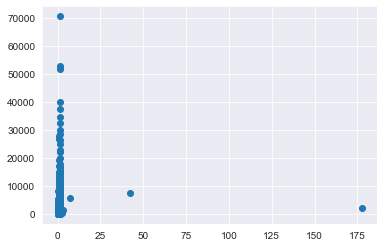

In [76]:
plt.scatter(df_master['rating'], df_master['retweet_count'], marker=None)

The dog rates given by the account handler don't correlate with the retweet and favourite count.

#### Q2

In [77]:
df_master.breed_prediction.value_counts()

not a dog             308
Golden Retriever      158
Labrador Retriever    105
Pembroke               95
Chihuahua              91
                     ... 
Scotch Terrier          1
Entlebucher             1
Japanese Spaniel        1
Standard Schnauzer      1
Irish Wolfhound         1
Name: breed_prediction, Length: 114, dtype: int64

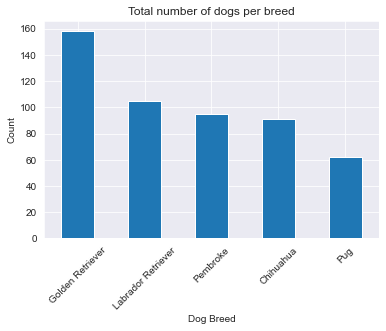

In [78]:
df_master.groupby('breed_prediction')['tweet_id'].count().sort_values(ascending = False).iloc[1:6].plot(kind='bar');
plt.xlabel('Dog Breed')
plt.ylabel('Count')
plt.title('Total number of dogs per breed')
plt.xticks(rotation = 45);

The most popular dog breed is a Golden Retriever

#### Q3

In [79]:
df_master.groupby('breed_prediction', as_index= True).mean()['rating'].sort_values(ascending = False)

breed_prediction
Clumber                        2.700000
not a dog                      1.607468
Bouvier Des Flandres           1.300000
Saluki                         1.250000
Pomeranian                     1.247619
                                 ...   
Tibetan Terrier                0.925000
Scotch Terrier                 0.900000
Walker Hound                   0.900000
Soft-Coated Wheaten Terrier    0.880000
Japanese Spaniel               0.500000
Name: rating, Length: 114, dtype: float64

The most highly rated dog breed is a 'Bouvier Des Flandres'. It's followed closely behind by the 'Saluki' in second place and the 'Briard ' just narrowly beating the 'Tibetan Mastiff'.  

Our winner 
 not the best shot


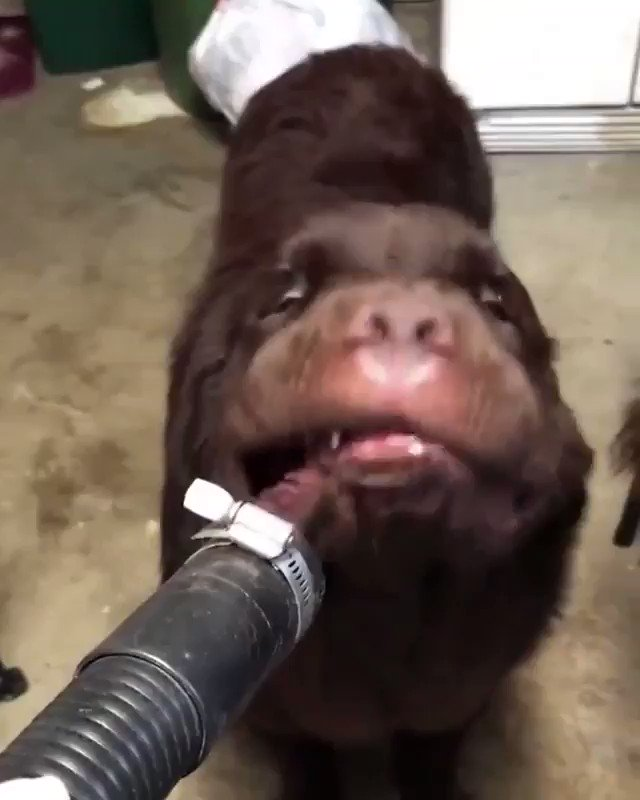

In [80]:
print("Our winner \n not the best shot")
display.Image('https://pbs.twimg.com/ext_tw_video_thumb/861288473281437696/pu/img/RERGmRgPyaaaB-tB.jpg')

First waddler up


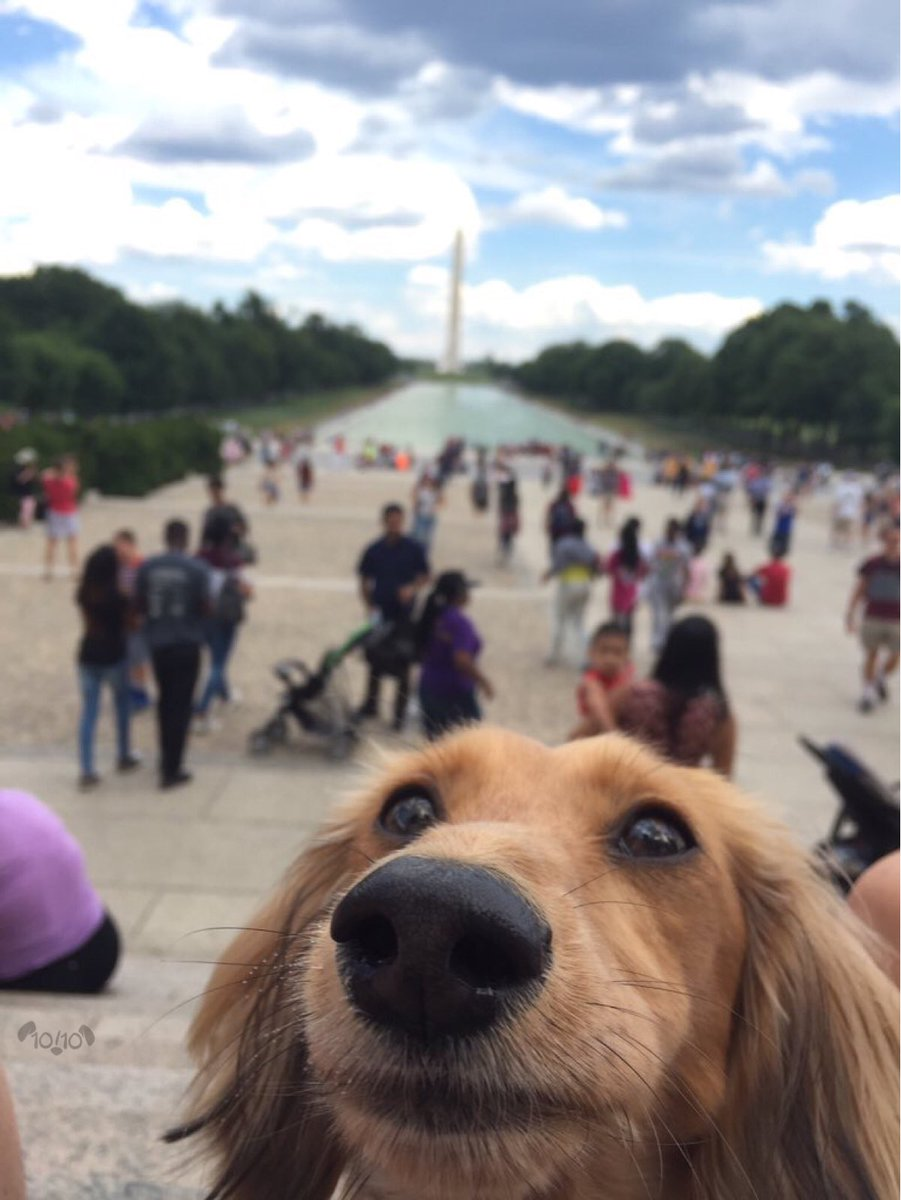

In [81]:
print('First waddler up')
display.Image('https://pbs.twimg.com/media/DDxPFwbWAAEbVVR.jpg')

The pawfect third in command


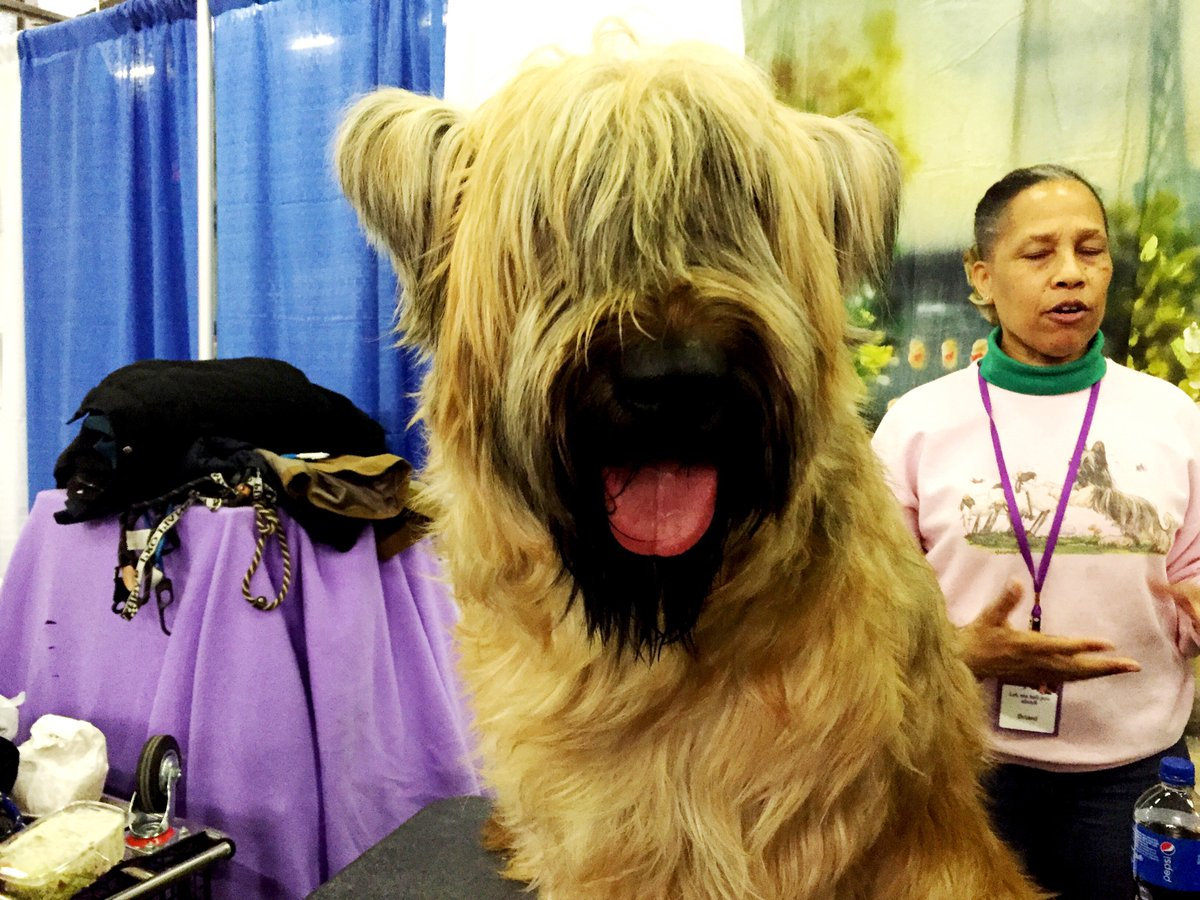

In [82]:
print('The pawfect third in command')
display.Image('https://pbs.twimg.com/media/C4lst0bXAAE6MP8.jpg')

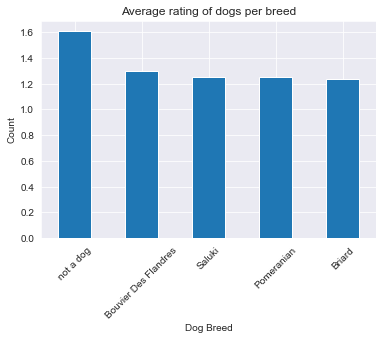

In [83]:
df_master.groupby('breed_prediction')['rating'].mean().sort_values(ascending = False).iloc[1:6].plot(kind='bar');
plt.xlabel('Dog Breed')
plt.ylabel('Count')
plt.title('Average rating of dogs per breed')
plt.xticks(rotation = 45);

#### Q4

In [84]:
df_master.groupby('breed_prediction', as_index= True).mean()['favorite_count'].sort_values(ascending=False)

breed_prediction
Bedlington Terrier      21538.500000
Saluki                  20791.750000
French Bulldog          17529.566667
Bouvier Des Flandres    15353.000000
Afghan Hound            14707.333333
                            ...     
Tibetan Terrier          1557.000000
Irish Wolfhound          1287.000000
Japanese Spaniel         1114.000000
Groenendael               977.500000
Brabancon Griffon         745.000000
Name: favorite_count, Length: 114, dtype: float64

The 'Saluki' seems to be everybody's favourite breed. The 'Bedlington Terrier' is the second most loved breed. My personal favourite is the 'French Bulldog' at third place. They're just so adorable.

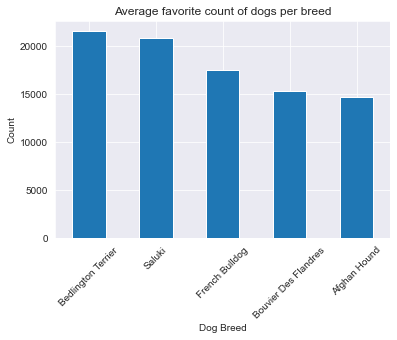

In [85]:
df_master.groupby('breed_prediction')['favorite_count'].mean().sort_values(ascending = False).iloc[:5].plot(kind='bar');
plt.xlabel('Dog Breed')
plt.ylabel('Count')
plt.title('Average favorite count of dogs per breed')
plt.xticks(rotation = 45);

### Insights:
1. The dog rates given by the account handler don't correlate with the retweet and favourite count.

2. The highest rated dog breed is a 'Bouvier Des Flandres'. It's followed closely behind by the 'Saluki' in second place and the 'Briard ' just narrowly beating the 'Tibetan Mastiff'.  

3. The most popular dog breed is a Golden Retriever

4. The 'Saluki' seems to be everybody's favourite breed. The 'Bedlington Terrier' is the second most loved breed. The 'French Bulldog' is at third place.